In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
#matplotlib inline

In [2]:
file_path = r'D:\Data Science Projects\Loa Approval\loan_data.csv'
file_name ='loan_data.csv'

In [3]:
df = pd.read_csv(file_path)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [5]:
#Handling missing values
#1- check how many columns have missing values
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
#droppiong unimportant columns
df = df.drop(['person_education','person_emp_exp'],axis=1)
df.head()

,person_age,person_gender,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
#to check how many rows and columns present in dataset
df.shape

(45000, 12)

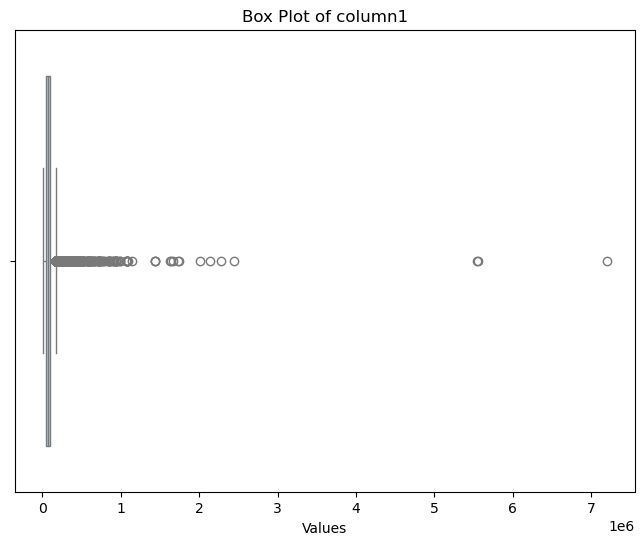

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['person_income'], color='lightblue')
plt.title('Box Plot of column1')
plt.xlabel('Values')
plt.show()

In [9]:
#removing outliers using Z-score
from scipy import stats
z_score = np.abs(stats.zscore(df['person_income']))
outliers = df[z_score > 3]

In [10]:
num_outliers = outliers.shape[0]
print(f"Number of outliers: {num_outliers}")

Number of outliers: 286


In [11]:
df = df[z_score <= 3]

In [12]:
df.shape

(44714, 12)

In [13]:
#to check if there are duplicates are available
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [14]:
#unique values of each columns
unique_values = df.apply(lambda x: x.unique())
unique_values

person_age                        [22.0, 21.0, 25.0, 23.0, 24.0, 26.0, 144.0, 12...
person_gender                                                        [female, male]
person_income                     [71948.0, 12282.0, 12438.0, 79753.0, 66135.0, ...
person_home_ownership                                  [RENT, OWN, MORTGAGE, OTHER]
loan_amnt                         [35000.0, 1000.0, 5500.0, 2500.0, 1600.0, 4500...
loan_intent                       [PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM...
loan_int_rate                     [16.02, 11.14, 12.87, 15.23, 14.27, 7.14, 12.4...
loan_percent_income               [0.49, 0.08, 0.44, 0.53, 0.19, 0.37, 0.35, 0.1...
cb_person_cred_hist_length        [3.0, 2.0, 4.0, 6.0, 9.0, 10.0, 8.0, 7.0, 5.0,...
credit_score                      [561, 504, 635, 675, 586, 532, 701, 585, 544, ...
previous_loan_defaults_on_file                                            [No, Yes]
loan_status                                                                 

In [15]:
#converting ordinal categorical variable into numerical
df['person_gender'] = df['person_gender'].replace({'female': 1, 'male': 0})

C:\Users\raiai\AppData\Local\Temp\ipykernel_3236\3410102297.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['person_gender'] = df['person_gender'].replace({'female': 1, 'male': 0})


In [16]:
df.sample(3)

,person_age,person_gender,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
39304,34.0,0,170142.0,MORTGAGE,10000.0,PERSONAL,14.58,0.06,12.0,655,No,0
42843,25.0,0,113461.0,RENT,30566.0,MEDICAL,14.66,0.27,3.0,673,No,1
40310,25.0,1,78904.0,RENT,9000.0,EDUCATION,10.40,0.11,4.0,439,Yes,0


In [17]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'No': 0, 'Yes': 1})
df.sample(3)

C:\Users\raiai\AppData\Local\Temp\ipykernel_3236\3034969909.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'No': 0, 'Yes': 1})


,person_age,person_gender,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
12345,25.0,1,97171.0,MORTGAGE,22000.0,EDUCATION,11.48,0.23,3.0,655,1,0
409,24.0,1,57356.0,RENT,24000.0,PERSONAL,17.80,0.42,2.0,672,0,1
3702,21.0,1,46845.0,OWN,5000.0,MEDICAL,8.94,0.11,2.0,623,0,0


In [18]:
df= pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'])

In [19]:
df.sample(3)

,person_age,person_gender,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
38776,36.0,0,59563.0,12000.0,13.99,0.20,12.0,541,1,0,False,False,False,True,False,False,False,False,False,True
18428,27.0,0,105315.0,20000.0,7.49,0.19,8.0,663,1,0,False,False,False,True,False,False,True,False,False,False
14580,25.0,1,47944.0,2000.0,7.66,0.04,4.0,670,0,1,False,False,False,True,False,False,True,False,False,False


In [20]:
df = df.replace({True: 1, False: 0})
df.sample(3)

C:\Users\raiai\AppData\Local\Temp\ipykernel_3236\1918475839.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,person_age,person_gender,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
20019,31.0,0,75707.0,3600.0,15.95,0.05,9.0,716,0,1,0,0,0,1,0,0,0,1,0,0
15948,21.0,1,10606.0,2800.0,7.40,0.26,2.0,627,0,1,0,0,0,1,1,0,0,0,0,0
13295,22.0,1,36981.0,2800.0,6.54,0.08,3.0,661,1,0,0,0,0,1,1,0,0,0,0,0


In [21]:
cols_to_scale=['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
df[cols_to_scale]= Scaler.fit_transform(df[cols_to_scale])
df.sample(3)

,person_age,person_gender,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
10299,0.040323,0,0.276146,0.263768,0.596022,0.151515,0.071429,0.594724,0,1,0,0,0,1,1,0,0,0,0,0
6528,0.024194,0,0.168772,0.162319,0.383402,0.151515,0.071429,0.609113,0,0,1,0,0,0,0,0,0,0,0,1
22649,0.064516,1,0.130843,0.202899,0.441701,0.227273,0.214286,0.534772,0,0,0,0,0,1,0,0,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.shape

(35771, 19)

In [92]:
X_test.shape

(8943, 19)

In [93]:
Y_train.shape

(35771,)

In [94]:
Y_test.shape

(8943,)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialize the model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))

# Add more hidden layers as needed
model.add(Dense(units=16, activation='relu'))

# Add output layer (1 unit for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\raiai\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8371 - loss: 0.3342 - val_accuracy: 0.8960 - val_loss: 0.2169
Epoch 2/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8997 - loss: 0.2168 - val_accuracy: 0.9040 - val_loss: 0.2097
Epoch 3/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9049 - loss: 0.2095 - val_accuracy: 0.9076 - val_loss: 0.2047
Epoch 4/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9065 - loss: 0.2039 - val_accuracy: 0.9076 - val_loss: 0.2027
Epoch 5/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9059 - loss: 0.2050 - val_accuracy: 0.9107 - val_loss: 0.1965
Epoch 6/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9121 - loss: 0.1954 - val_accuracy: 0.9138 - val_loss: 0.1953
Epoch 7/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9110 - loss: 0.1973 - val_accuracy: 0.9107 - val_loss: 0.1942
Epoch 8/50
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9161 - loss: 0.1912 -

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9159 - loss: 0.1850
Test Loss: 0.185066819190979
Test Accuracy: 0.9156882762908936


In [28]:
predictions = model.predict(X_test)
# Convert probabilities to binary (1 or 0)
predictions = (predictions > 0.5).astype(int)

# If you want to see the predictions alongside actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(results)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
       Actual  Predicted
4739        0          0
9416        0          0
17309       0          0
4826        0          0
8917        0          0
...       ...        ...
12173       1          1
18830       0          0
2130        0          0
36356       0          0
4981        0          0

[8943 rows x 2 columns]


In [29]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predictions,))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      6962
           1       0.85      0.76      0.80      1981

    accuracy                           0.92      8943
   macro avg       0.89      0.86      0.87      8943
weighted avg       0.91      0.92      0.91      8943



In [30]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[6687  275]
 [ 479 1502]]


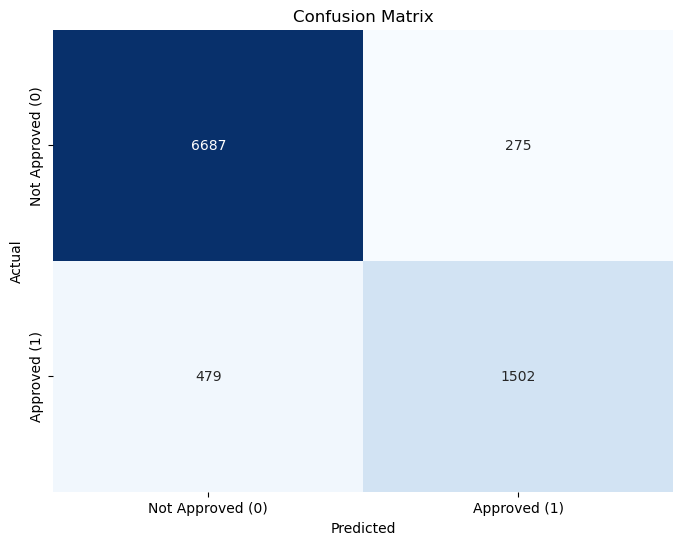

In [31]:


# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Approved (0)', 'Approved (1)'],
            yticklabels=['Not Approved (0)', 'Approved (1)'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

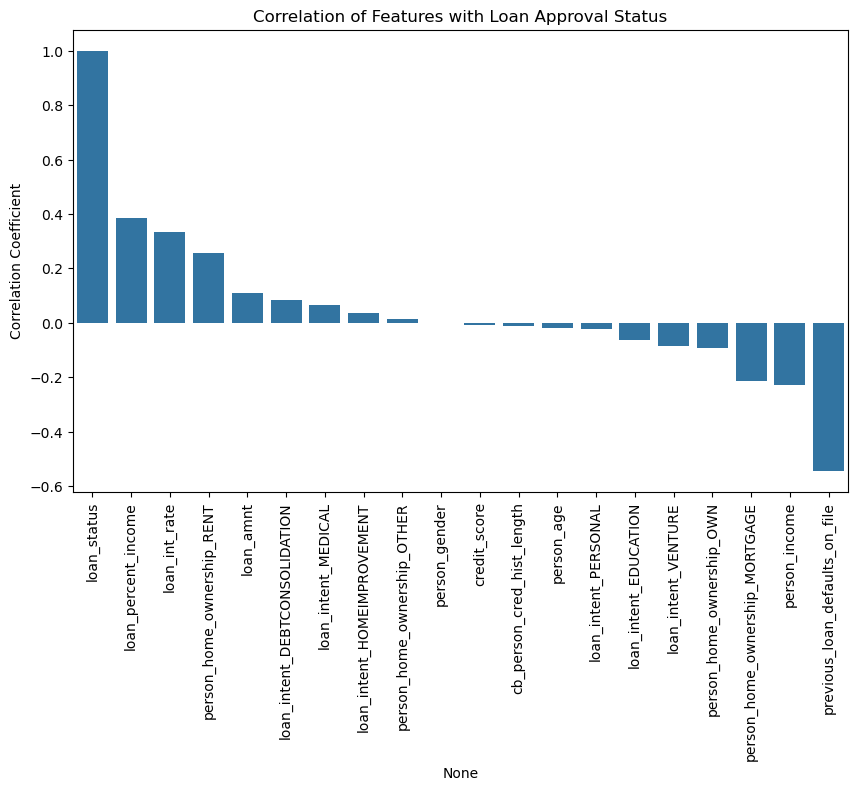

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'loan_approved' is your target variable (0 or 1)
# df is your DataFrame containing all relevant features

# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of each feature with the loan approval status
loan_approval_corr = correlation_matrix['loan_status'].sort_values(ascending=False)

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_approval_corr.index, y=loan_approval_corr.values)
plt.title('Correlation of Features with Loan Approval Status')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.show()
